In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


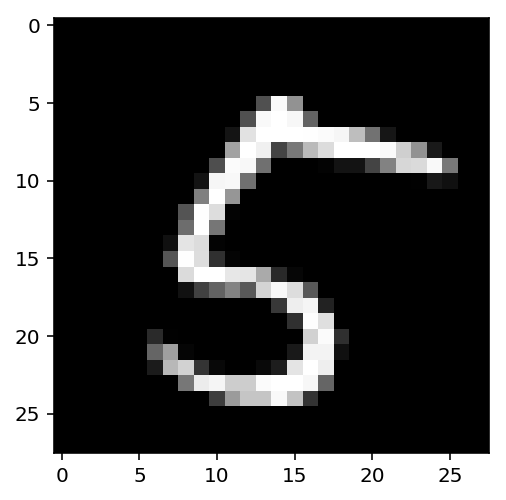

In [29]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(z):
  return 1/(1+torch.exp(-z))

inputs = images.view(images.shape[0], -1)
n_hidden = 256
n_output = 10

W1 = torch.rand(inputs.shape[1], n_hidden)
W2 = torch.rand(n_hidden, n_output)

b1 = torch.rand((1, n_hidden))
b2 = torch.rand((1, n_output))

a1 = activation(torch.matmul(inputs, W1) + b1)

out = torch.matmul(a1, W2) + b2

In [0]:
def softmax(z):
  return torch.exp(z) / torch.sum(torch.exp(z), dim=1).view(-1, 1)

In [32]:
prob = softmax(out)

print(prob.shape)
print(prob.sum(dim=1))

torch.Size([64, 10])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [0]:
from torch import nn

In [0]:
n_input = inputs.shape[1]
n_hidden = 256
n_output = 10

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden = nn.Linear(n_input, n_hidden)
    self.output = nn.Linear(n_hidden, n_output)
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [36]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden = nn.Linear(n_input, n_hidden)
    self.output = nn.Linear(n_hidden, n_output)
    
  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x))

    return x

In [0]:
class Network(nn.Module):
  def __init__(self, n_input, n_h1, n_h2, out):
    super().__init__()
    self.fc1 = nn.Linear(n_input, n_h1)
    self.fc2 = nn.Linear(n_h1, n_h2)
    self.fc3 = nn.Linear(n_h2, out)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x), dim=1)
    
    return x

In [40]:
model = Network(784, 128, 64, 10)
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0150,  0.0169, -0.0310,  ...,  0.0351, -0.0086, -0.0281],
        [-0.0354, -0.0291,  0.0112,  ..., -0.0177, -0.0067,  0.0276],
        [-0.0076,  0.0024,  0.0287,  ...,  0.0322, -0.0189, -0.0204],
        ...,
        [-0.0046,  0.0345, -0.0234,  ...,  0.0052, -0.0171, -0.0110],
        [-0.0319, -0.0205, -0.0344,  ...,  0.0285,  0.0123, -0.0048],
        [ 0.0195,  0.0322,  0.0067,  ...,  0.0028,  0.0226,  0.0254]],
       requires_grad=True)
Parameter containing:
tensor([-0.0157, -0.0033,  0.0091,  0.0224, -0.0063,  0.0231,  0.0109,  0.0142,
        -0.0321, -0.0323, -0.0099,  0.0023,  0.0266,  0.0171, -0.0287, -0.0261,
         0.0076,  0.0147,  0.0252,  0.0315,  0.0009,  0.0047, -0.0080,  0.0204,
        -0.0235,  0.0010, -0.0025, -0.0290,  0.0020,  0.0062, -0.0292, -0.0299,
        -0.0249, -0.0100,  0.0216, -0.0233, -0.0117,  0.0121, -0.0184,  0.0122,
        -0.0039, -0.0153, -0.0198, -0.0160, -0.0304,  0.0123,  0.0122, -0.0018,
        -0.0030

In [42]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0009,  0.0014,  0.0144,  ..., -0.0037,  0.0078,  0.0143],
        [-0.0007, -0.0026,  0.0017,  ...,  0.0088,  0.0003,  0.0009],
        [ 0.0128,  0.0193,  0.0022,  ..., -0.0064,  0.0151, -0.0039],
        ...,
        [-0.0050,  0.0014,  0.0024,  ...,  0.0120, -0.0003,  0.0005],
        [-0.0111,  0.0090, -0.0086,  ...,  0.0022,  0.0192,  0.0067],
        [ 0.0037,  0.0048, -0.0235,  ..., -0.0059, -0.0002,  0.0122]])

In [44]:
trainloader

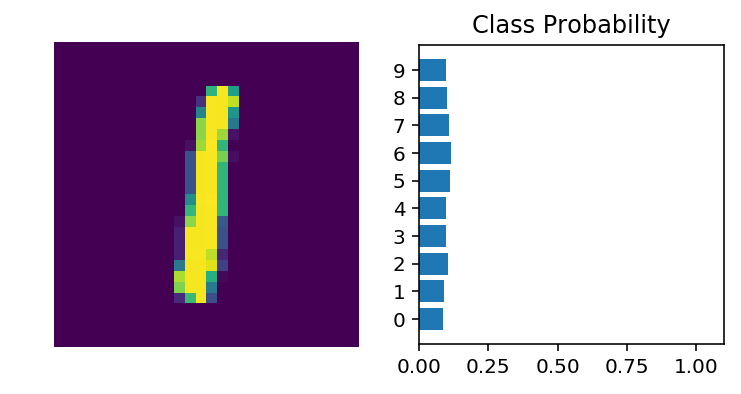

In [55]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx = 0

ps = model.forward(images[img_idx, :])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [0]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 9))
  ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
  ax1.axis('off')
  ax2.barh(np.arange(10), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)

In [56]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)

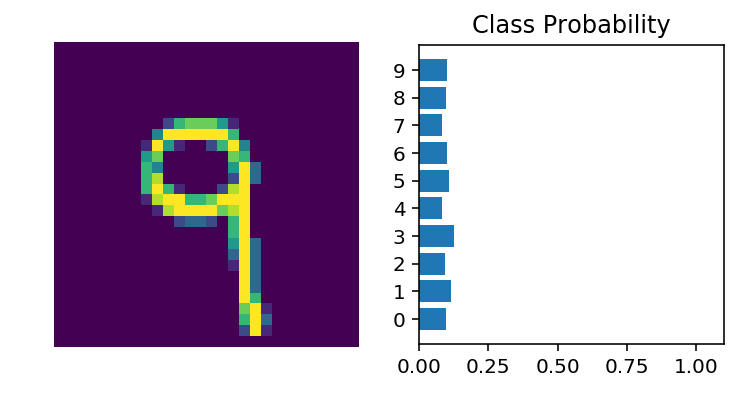

In [58]:
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [59]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [60]:
model[0]

Linear(in_features=784, out_features=128, bias=True)

In [61]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)